<a href="https://colab.research.google.com/github/dfosorio111/RL-IELE/blob/Emmanuel/Taller%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 1: Multi Armed Bandits (MAB)

Diego Fernando Osorio Diaz *df.osorio11@uniandes.edu.co* **aja falta**

Emmanuel González González *e.gonzalezg@uniandes.edu.co* 201614679


Para este taller se programó cada una de los algoritmos a explorar como una función, la cual retorna la recompensa de cada iteración, la acción escogida y la recompensa esperada de cada acción posible y tiene como entrada el bandit, el número de iteraciones y los parámetros característicos de cada uno de los algoritmos.

In [2]:
# Se importa la clase BanditEnvs del archivo envs.pyc
from envs import BanditEnvs

# Se importan otras librerias utiles
import random
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import clear_output
bandit_envs = BanditEnvs(k=10)


# Escenario 1

## Acciones aleatorias

A continuación se presenta una implementación de acciones aleatorias sobre el segundo escenario. Usted debe realizar una implementación similar con las tres metodologías propuestas en la guía y estudiadas en clase.

In [ ]:
# Ejemplo de selección aleatoria de entornos
n = 1000
rand_reward = []
rand_action_selected = []

# Se reinician los entornos
bandit_envs.reset()

# Se ejecutan n pasos
for i in range(0,n):
  # Accion aleatoria
  a = random.randint(0,9)
  # Se ejecuta la accion a
  r = bandit_envs.run_env_1(a)
  rand_reward.append(r)
  rand_action_selected.append(a)

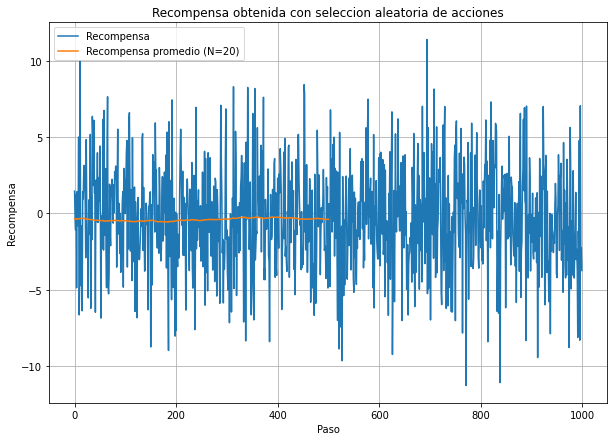

In [ ]:
# N window mean
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

# Plot reward
fig=plt.figure(figsize=(10, 7))
plt.plot(rand_reward)
plt.plot(running_mean(rand_reward, 500))
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con seleccion aleatoria de acciones')
plt.legend(['Recompensa','Recompensa promedio (N=20)'])
plt.grid(True)
plt.show()

## Política ε-Greedy

Con el metodo epsilon greedy se requiere sintonizar un parametro el cual controla la probabilidad de tomar una acción diferente a la que maximiza la recompensa segun la recompenza esperada.

In [ ]:
def e_greedy (ep,band,ite):
  band.reset()
  recompensaA = []
  for i in range(10):
    recompensaA.append(0)
  recompensaT = []
  a_selec = []
  ai=random.randint(0,9)
  a_selec.append(ai)
  r=band.run_env_1(ai)
  recompensaT.append(r)
  recompensaA[ai]=r
  for i in range (1,ite):
    x=random.random()
    if x<=ep:
      ai=random.randint(0,9)
      a_selec.append(ai)
      r=band.run_env_1(ai)
      recompensaT.append(r)
      recompensaA[ai]=recompensaA[ai]+(r-recompensaA[ai])/a_selec.count(ai)
    else:
      ai= recompensaA.index(np.max(recompensaA))
      a_selec.append(ai)
      r=band.run_env_1(ai)
      recompensaT.append(r)
      recompensaA[ai]=recompensaA[ai]+(r-recompensaA[ai])/a_selec.count(ai)

  return recompensaA,recompensaT,a_selec

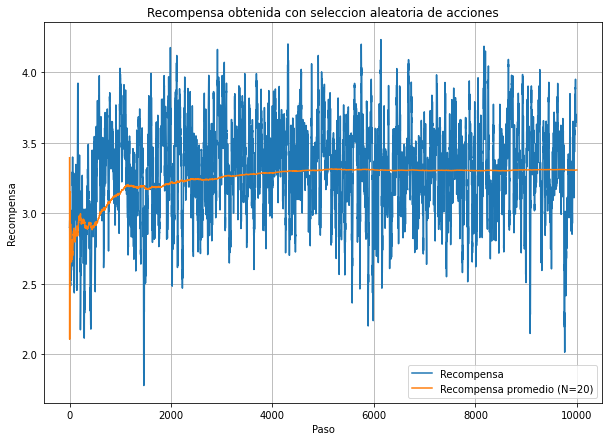

[1.2197504974762512, 0.016398883499530243, 0.43209840331548655, 3.582633836307534, 2.311034694132411, 3.094740160080386, 3.017578386823232, -0.02809630343358653, -2.601333717500913, -0.8194588396233058]


In [ ]:
ra,rt,a=e_greedy(0.1,bandit_envs,10000)
fig=plt.figure(figsize=(10, 7))
plt.plot(running_mean(rt, 10))
rpt=np.cumsum(rt)
aja=[]
for i in range(1,len(rt)+1):
  aja.append(rpt[i-1]/i)

plt.plot(aja)
plt.xlabel('Paso')
plt.ylabel('Recompensa')
plt.title('Recompensa obtenida con seleccion aleatoria de acciones')
plt.legend(['Recompensa','Recompensa promedio (N=20)'])
plt.grid(True)
plt.show()
print(ra)
